# 1.1 Data Preprocessing

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib as mpl
import matplotlib.pylab as pylab
from pandas.plotting import scatter_matrix

#### Ingesting data

In [2]:
train_df = pd.read_csv("/Users/saikumargv/Downloads/titanic/train.csv")
test_df = pd.read_csv("/Users/saikumargv/Downloads/titanic/test.csv")
#data_df = pd.concat(train_df,test_df, index=Tru)
data_df = train_df.append(test_df)

/var/folders/ty/_y0n6grj74n12m7w5j07c6q80000gn/T/ipykernel_44472/2677008113.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = train_df.append(test_df)


#### Understanding the Data

In [3]:
data_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [4]:
data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


No of unique values: 2

Unique values: [ 0.  1. nan]

No of nulls: 418

Counts per unique
0.0    549
1.0    342
Name: Survived, dtype: int64


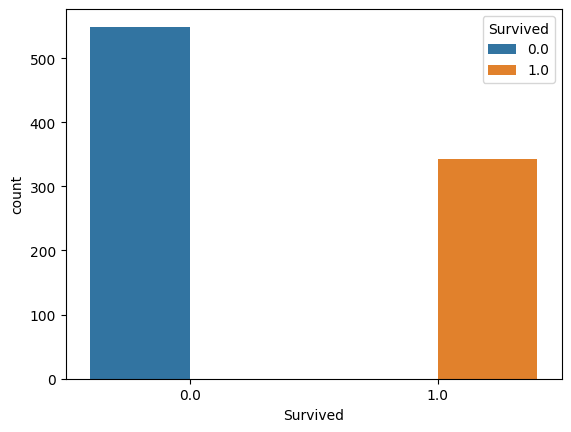

In [5]:
def check(data, column, count = True):
    print(f'No of unique values: {data[column].nunique()}')
    print(f'\nUnique values: {data[column].unique()}')
    print(f'\nNo of nulls: {data[column].isnull().sum()}')
    print(f'\nCounts per unique\n{data[column].value_counts()}')
    
    if count == True:
        sns.countplot(data = data, x = column, hue = 'Survived')
    else:
        sns.displot(data[column], kde = True)
check(data_df, 'Survived')

No of unique values: 3

Unique values: [3 1 2]

No of nulls: 0

Counts per unique
3    709
1    323
2    277
Name: Pclass, dtype: int64


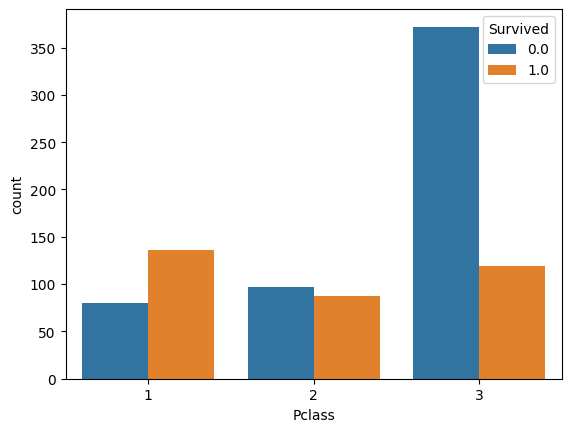

In [6]:
check(data_df,'Pclass')

No of unique values: 2

Unique values: ['male' 'female']

No of nulls: 0

Counts per unique
male      843
female    466
Name: Sex, dtype: int64


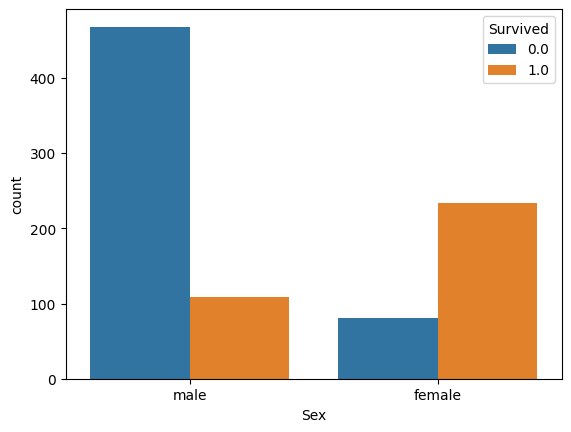

In [7]:
check(data_df,'Sex')

No of unique values: 98

Unique values: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

No of nulls: 263

Counts per unique
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64


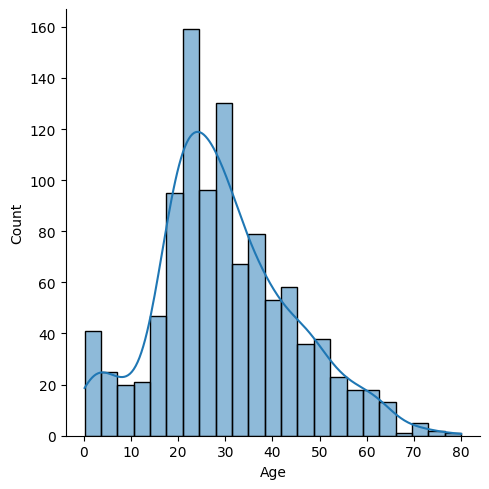

In [8]:
check(data_df, 'Age', False)

In [9]:
data_df.corr()

/var/folders/ty/_y0n6grj74n12m7w5j07c6q80000gn/T/ipykernel_44472/3493117147.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [10]:
data_df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


No of unique values: 3

Unique values: ['S' 'C' 'Q' nan]

No of nulls: 2

Counts per unique
S    914
C    270
Q    123
Name: Embarked, dtype: int64


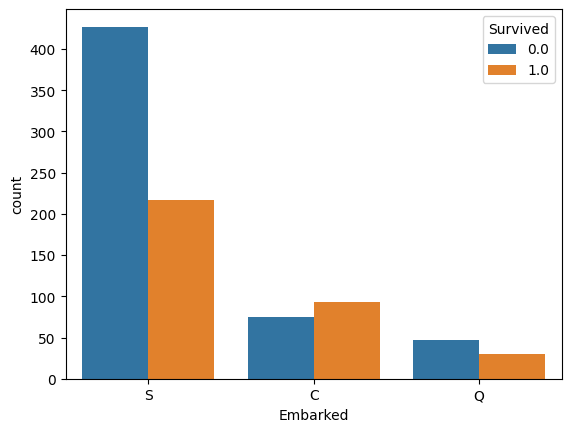

In [11]:
check(data_df, 'Embarked')

### Finding out the missing values in age coulmn based on titles

In [12]:
data_df['Title'] = data_df['Name']
for title_str in data_df['Name']:
    data_df['Title'] = data_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
data_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [13]:
data_df['Title'] = data_df['Title'].replace(['Mlle','Ms','Mme'], 'Miss')
data_df['Title'] = data_df['Title'].replace(['Major','Sir','Col','Capt','Don','Jonkheer'], 'Mr')
data_df['Title'] = data_df['Title'].replace(['Lady','Dona','Countess'], 'Mrs')
data_df['Title'] = data_df['Title'].replace('Rev', 'Rare')

In [14]:
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rare']
for i in titles:
    age_to_impute = data_df.groupby('Title')['Age'].median()[titles.index(i)]
    print([age_to_impute,i])

[49.0, 'Dr']
[4.0, 'Master']
[22.0, 'Miss']
[30.0, 'Mr']
[36.0, 'Mrs']
[41.5, 'Rare']


In [15]:
for dataset in data_df:    
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == 'Dr'), 'Age'] = 49
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == 'Master'), 'Age'] = 4
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == 'Miss'), 'Age'] = 22
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == 'Mr'), 'Age'] = 30
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == 'Mrs'), 'Age'] = 36
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == 'Rare'), 'Age'] = 41.5
data_df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0.0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [16]:
# # Substituting Age values in TRAIN_DF and TEST_DF:
# train_df['Age'] = data_df['Age'][:891]
# test_df['Age'] = data_df['Age'][891:]

#### Computing family size to use as feature

In [17]:
data_df['Family_Size'] = data_df['Parch'] + data_df['SibSp']

#### Introducing new feature Fam_Survival

In [18]:
data_df['Last_Name'] = data_df['Name'].apply(lambda x: str.split(x, ",")[0])

data_df['Last_Name'].unique()
data_df['Fare'].fillna(data_df['Fare'].mean(), inplace=True)

default = 0.5
data_df['Fam_Survival'] = default

for j, grp_df in data_df[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for i, r in grp_df.iterrows():
            max_survival = grp_df.drop(i)['Survived'].max()
            #print(grp_df)
            min_survival = grp_df.drop(i)['Survived'].min()
            ID = r['PassengerId']
            if (max_survival== 1.0):
                data_df.loc[data_df['PassengerId'] == ID, 'Fam_Survival'] = 1
            elif (min_survival==0.0):
                data_df.loc[data_df['PassengerId'] == ID, 'Fam_Survival'] = 0

print("Number of passengers with family survival information:", 
      data_df.loc[data_df['Fam_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


In [19]:
for j, grp_df in data_df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for i, r in grp_df.iterrows():
            if (r['Fam_Survival'] == 0) | (r['Fam_Survival']== 0.5):
                max_survival = grp_df.drop(i)['Survived'].max()
                min_survival = grp_df.drop(i)['Survived'].min()
                ID = r['PassengerId']
                if (max_survival == 1.0):
                    data_df.loc[data_df['PassengerId'] == ID, 'Fam_Survival'] = 1
                elif (min_survival==0.0):
                    data_df.loc[data_df['PassengerId'] == ID, 'Fam_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " 
      +str(data_df[data_df['Fam_Survival']!=0.5].shape[0]))

Number of passenger with family/group survival information: 546


**Filling some missing values regarding Fare and doing some basic encoding**

In [20]:
data_df['Fare'].fillna(data_df['Fare'].median(), inplace = True)
data_df['Fare_value'] = pd.qcut(data_df['Fare'], 5)
data_df[['Fare_value', 'Survived']].groupby(['Fare_value'], as_index=False).mean().sort_values(by='Fare_value', ascending=True)
label = LabelEncoder()
data_df['Fare_Code'] = label.fit_transform(data_df['Fare_value'])
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Last_Name,Fam_Survival,Fare_value,Fare_Code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Braund,0.5,"(-0.001, 7.854]",0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Cumings,0.5,"(41.579, 512.329]",4
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,Heikkinen,0.5,"(7.854, 10.5]",1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Futrelle,0.0,"(41.579, 512.329]",4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Allen,0.5,"(7.854, 10.5]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,0,Spector,0.5,"(7.854, 10.5]",1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mrs,0,Oliva y Ocana,1.0,"(41.579, 512.329]",4
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0,Saether,0.5,"(-0.001, 7.854]",0
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S,Mr,0,Ware,0.5,"(7.854, 10.5]",1


#### Applying encoding for Age

In [21]:
data_df['Age_value'] = pd.qcut(data_df['Age'], 4)

label = LabelEncoder()
data_df['Age_Code'] = label.fit_transform(data_df['Age_value'])

#### Spliting Train and Test data

In [22]:
train_df['Family_Size'] = data_df['Family_Size'][:891]
test_df['Family_Size'] = data_df['Family_Size'][891:]

train_df['Age_Code'] = data_df['Age_Code'][:891]
test_df['Age_Code'] = data_df['Age_Code'][891:]

train_df['Fare_Code'] = data_df['Fare_Code'][:891]
test_df['Fare_Code'] = data_df['Fare_Code'][891:]

train_df['Fam_Survival'] = data_df['Fam_Survival'][:891]
test_df['Fam_Survival'] = data_df['Fam_Survival'][891:]

/var/folders/ty/_y0n6grj74n12m7w5j07c6q80000gn/T/ipykernel_44472/3468588805.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_df['Family_Size'] = data_df['Family_Size'][:891]
/var/folders/ty/_y0n6grj74n12m7w5j07c6q80000gn/T/ipykernel_44472/3468588805.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_df['Family_Size'] = data_df['Family_Size'][891:]
/var/folders/ty/_y0n6grj74n12m7w5j07c6q80000gn/T/ipykernel_44472/3468588805.py:4: FutureWarning: The behavior of `serie

**Replacing male and female with 0s and 1s and dropping some columns that we used in the previous feature engineering steps**

In [23]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [24]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Age_Code,Fare_Code,Fam_Survival
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,2,0,0.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,1,3,0,0.5
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0,3,1,0.5
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0,1,1,0.5
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,2,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1,1,0.5
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,0,3,4,1.0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,3,0,0.5
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,0,1,1,0.5


#### Droping unwanted ccolumns

In [25]:
train_df.drop(['Name', 'PassengerId','Age','Fare','SibSp', 'Parch', 'Ticket', 'Cabin',
               'Embarked'], axis = 1, inplace = True)
test_df.drop(['Name','PassengerId','Age','Fare','SibSp', 'Parch', 'Ticket', 'Cabin',
              'Embarked'], axis = 1, inplace = True)

In [26]:
train_df.head(5)

,Survived,Pclass,Sex,Family_Size,Age_Code,Fare_Code,Fam_Survival
0,0,3,0,1,0,0,0.5
1,1,1,1,1,3,4,0.5
2,1,3,1,0,1,1,0.5
3,1,1,1,1,2,4,0.0
4,0,3,0,0,2,1,0.5


In [27]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_test = test_df.copy()

**Scaling our data and getting it ready for modelling**

In [28]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

# 1.2 Plotting Decision tree

In [29]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree

89.23

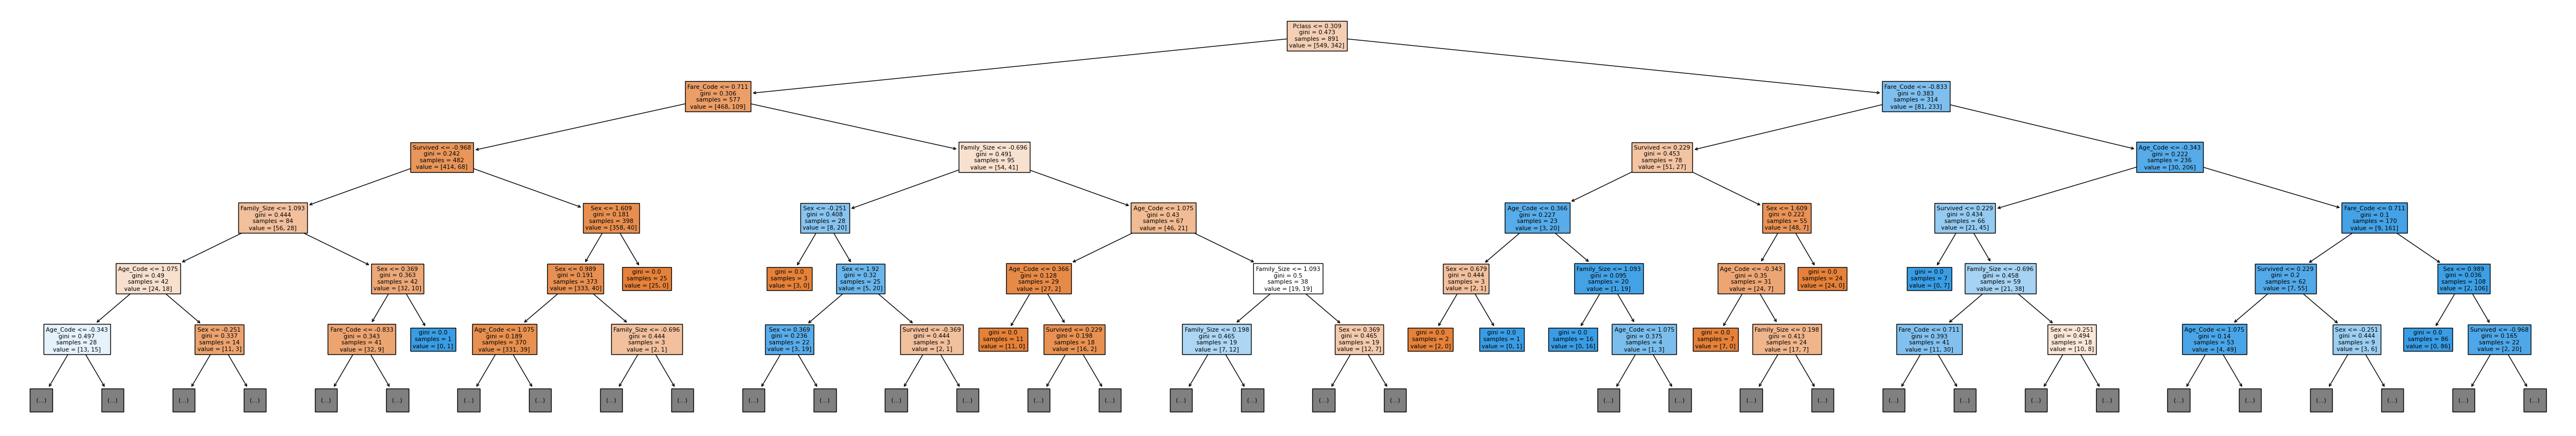

In [30]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(60,10))

plot_tree(decision_tree.fit(X,y), feature_names=train_df.columns, max_depth= 5, filled=True);


# 1.3 Five Fold Cross Validation - Decision Tree

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std

cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(decision_tree,X,y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.820 (0.016)


# 1.4 Five Fold Cross Validation - Random Forest

In [32]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
Y_pred = random_forest.predict(X_test)
random_forest.score(X,y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)
acc_random_forest

89.23

In [33]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(random_forest,X,y, scoring='accuracy', cv=cv, n_jobs=-1)
#print(cv,scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.825 (0.021)
